In [1]:
import sys, os, time, shutil, random
from pathlib import Path
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import omnibelt as belt
import omnifig as fig
import numpy as np
np.set_printoptions(linewidth=120)
%load_ext autoreload
%autoreload 2
# %pdb
import pickle
from tabulate import tabulate
from tqdm import tqdm_notebook as tqdm
import torch
from torch import nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
# import torchvision.models
from torch.utils.data import Dataset, DataLoader, TensorDataset

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
# import matplotlib.patches as mpatches
# import matplotlib.pyplot as plt
# import matplotlib.cm
# from matplotlib import animation
# import matplotlib as mpl
# # mpl.rc('image', cmap='gray')
# import seaborn as sns
# import pandas as pd
# from sklearn.preprocessing import normalize

# from omnilearn import util

fig.initialize();
# import gpumap
# from c3linearize import linearize, class_graph

In [2]:
import plethora

In [3]:
from plethora import util

In [3]:
from plethora.datasets.toy import SwissRollDataset, HelixDataset
from plethora.datasets import MNIST

In [4]:
from plethora.framework.extractors import Timm_Extractor

In [5]:
dataset = MNIST()
len(dataset)

60000

In [ ]:
dataset.get_space('observation')

In [3]:
from plethora.framework.util import export, load_export

In [4]:
d = {'x': 13, 'st': 'asdf', 'y': torch.arange(3), 'n': np.random.rand(5), 'a': 'haha'}
d

{'x': 13,
 'st': 'asdf',
 'y': tensor([0, 1, 2]),
 'n': array([0.37727466, 0.17807146, 0.81833789, 0.18673714, 0.67568585]),
 'a': 'haha'}

In [5]:
export(d, name='test')

NotImplementedError: 

In [18]:
np.save?

In [36]:
load_export('test')

{'a': 'haha',
 'n': array([0.35749172, 0.75609602, 0.61939408, 0.36941852, 0.82241137]),
 'st': 'asdf',
 'x': 13,
 'y': tensor([0, 1, 2])}

In [29]:
from pathlib import Path
p = Path(r'C:\Users\anwan\Documents\workspace\test\n.npy')
p.exists()

True

In [37]:
model = Timm_Extractor('mobilenetv3_large_100', din=dataset.get_space('observation'))
model

Timm_Extractor(
  (model): MobileNetV3(
    (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): Hardswish()
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (1): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(6

In [38]:
dataset.load();

C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [39]:
batch = dataset.get_batch()
batch

Batch[64]({observation}, {target})

In [40]:
X, Y = batch['observation'], batch['target']
X.shape, Y.shape

(torch.Size([64, 1, 32, 32]), torch.Size([64]))

<IPython.core.display.Javascript object>


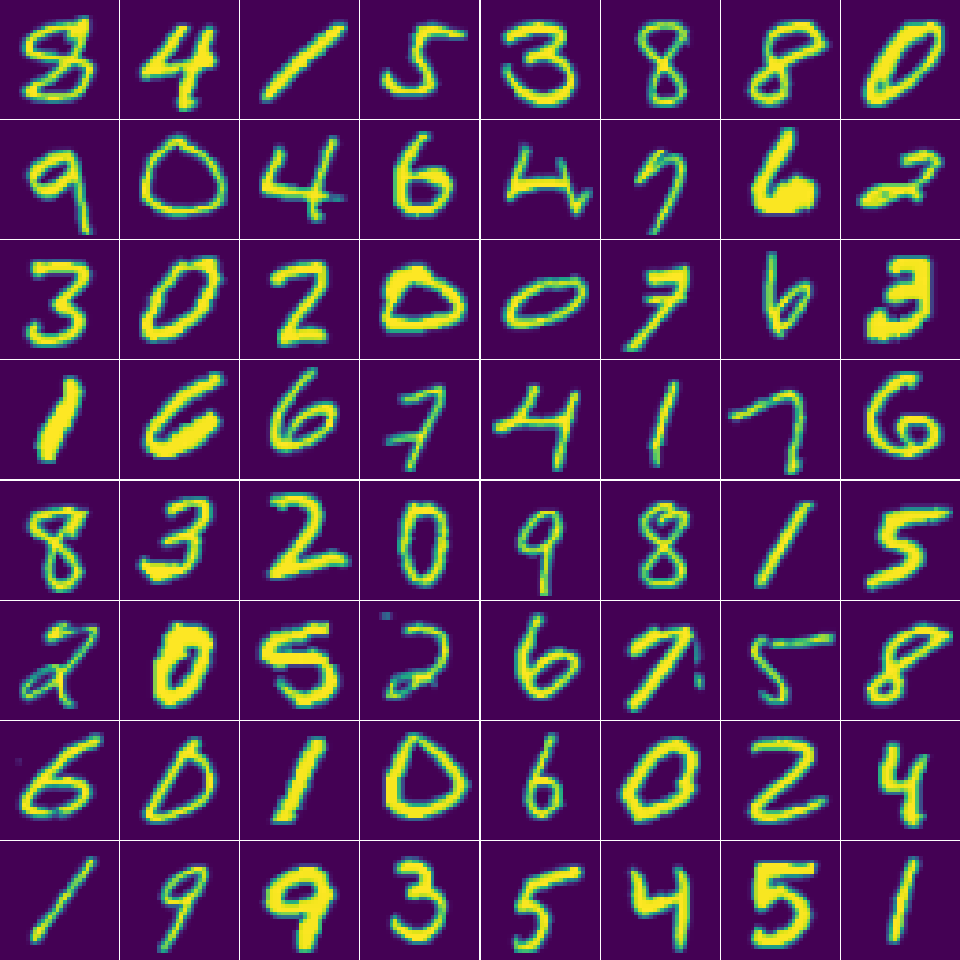

In [41]:
util.plot_imgs(X, );#titles=batch['target'].tolist());

In [42]:
with torch.no_grad():
    Z = model(X)
Z.shape

torch.Size([64, 1280])

In [36]:
dataset = SwissRollDataset(10, noise=.1, seed=11).load()

dataset

SwissRollDataset<None>[10]

In [42]:
bs = list(dataset.get_iterator(batch_size=4, num_samples=21, force_batch_size=True, 
                          hard_limit=True, 
                          pbar=tqdm))

  0%|          | 0/20 [00:00<?, ?it/s]

In [43]:
[b.sel for b in bs]

[tensor([7, 4, 1, 3]),
 tensor([9, 5, 0, 2]),
 tensor([8, 4, 1, 0]),
 tensor([3, 9, 6, 2]),
 tensor([1, 0, 3, 5])]

In [14]:
X = dataset.get_observation()
X.shape

torch.Size([10, 3])

In [7]:
b = dataset.get_batch()
b

Batch[64]({observation}, {target}, {label}, {mechanism})

In [8]:
b.get('observation').shape

torch.Size([64, 3])

In [9]:
b

Batch[64](observation, {target}, {label}, {mechanism})

In [4]:
from wrapt import ObjectProxy
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
class Value(ObjectProxy):
	def __init__(self, val):
		super().__init__(val)
		# self.set(val)
		self._self_attrs = {}
		
	def __reduce__(self, *args, **kwargs):
		val = self.get()
		return LoadedValue, (val,)
		return type(val), (val,)
		return type(self), (self.get(),)

	def __reduce_ex__(self, *args, **kwargs):
		val = self.get()
		return LoadedValue, (val,)
		return type(val), (val,)
		return type(self), (self.get(),)
	
	def __getstate__(self):
		return self.get()
	
	def __setstate__(self, state):
		self.set(state)
	
	def get(self):
		return self.__wrapped__
	
	def set(self, val):
		self.__wrapped__ = val

In [5]:
pdist = nn.PairwiseDistance(p=2)

In [9]:
x, y = torch.randn(3), torch.randn(3)
pdist(x, y)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [8]:
x.sub(y).pow(2).sum(-1).sqrt()

tensor([1.0639, 1.9210, 4.6975, 2.1334])

In [18]:

class Model:
    class Builder:
#         @classmethod
        def __get__(self, instance, owner):
            print(instance, owner)
            self.instance = instance
            self.owner = owner

        def __call__(self):
            return self.owner()



    pass

In [22]:
builder = Model.Builder()
builder

In [20]:
Model.Builder

__main__.Model.Builder

In [21]:
builder()

AttributeError: 'Builder' object has no attribute 'owner'

In [6]:
# for batch in dataset:
#     break
# batch

In [7]:
dataset = HelixDataset(5000, n_helix=5, w=2, noise=.01, periodic_strand=True).load()
X = dataset.get_observation()
X.shape

torch.Size([5000, 3])

<IPython.core.display.Javascript object>


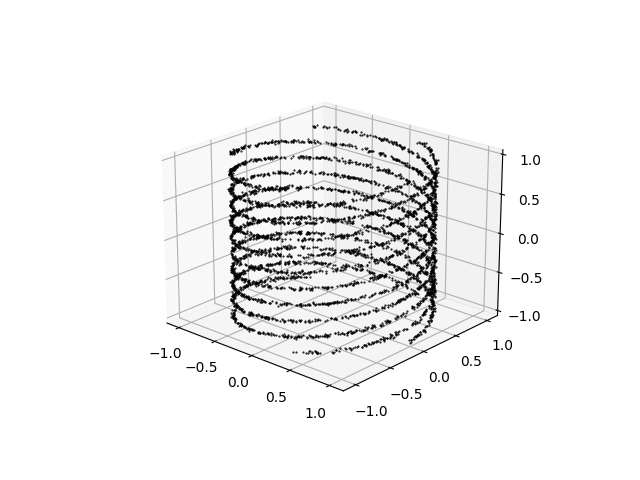

In [8]:
plt.figure()
data_ax = plt.axes(projection='3d')
plt.plot(*X.t(), ls='', marker='.', c='k', ms=1, );

In [39]:
dataset.get_label_space().expanded_len()

7

In [47]:
lbls = dataset.generate_label(6)
lbls

tensor([[-0.9269,  2.0000],
        [-0.5773,  0.0000],
        [ 0.7629,  2.0000],
        [-0.5492,  3.0000],
        [ 0.0580,  3.0000],
        [-0.9987,  1.0000]])

In [49]:
dataset.generate_observation_from_label(lbls)

tensor([[-0.9658,  0.1591, -0.9321],
        [-0.8807,  0.4796, -0.5727],
        [ 0.5173,  0.8665,  0.7698],
        [ 0.9439,  0.3157, -0.5291],
        [-0.5500, -0.8207,  0.0606],
        [ 0.2981,  0.9585, -1.0069]])

In [63]:
class A:
    @staticmethod
    def f(x):
        return x + 2

class B(A):
    @classmethod
    def f(cls, x):
        return super().f(x) * 2

In [64]:
b = B()
b.f(1)

6

In [1]:
import torch

In [2]:
x = torch.arange(10)
x.sample_format = 'test'

In [3]:
x.sample_format

'test'

In [5]:
y = x + 1
x.sample_format

'test'

In [6]:
import piq

In [7]:
import torch
from piq import ssim, SSIMLoss

x = torch.rand(4, 3, 256, 256, requires_grad=True)
y = torch.rand(4, 3, 256, 256)

ssim_index: torch.Tensor = ssim(x, y, data_range=1.)

loss = SSIMLoss(data_range=1.)
output: torch.Tensor = loss(x, y)
output.backward()

In [11]:
out = ssim(x,y,data_range=1., reduction='none')
out.shape

torch.Size([4])

In [12]:
out

tensor([0.0030, 0.0057, 0.0061, 0.0069], grad_fn=<MeanBackward1>)

In [5]:
len(dataset)

1000

In [6]:
dataset.get_observation().shape

torch.Size([1000, 3])

In [7]:
out = dataset.subset(0.5)
out

SwissRollDataset<None>[500]

In [8]:
dataset.get_observation().shape

torch.Size([1000, 3])

In [9]:
out.get_observation().shape

torch.Size([500, 3])

In [10]:
out = dataset.split({'train':None, 'val':0.2}, shuffle=True)
out

{'train': SwissRollDataset<train>[800], 'val': SwissRollDataset<val>[200]}

In [11]:
dataset

SwissRollDataset<None>[1000]

In [51]:
dataset.din, dataset.dout

(Joint(Bound(min=-1, max=1), Bound(min=-1, max=1), Bound(min=-1, max=1)),
 Joint(Periodic(2), Categorical(5)))

In [52]:
dataset.din.shape

(3,)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [16]:
from omnilearn import models

In [15]:
f = GradientBoostingRegressor()

In [43]:
N = 1000
width = 16
depth = 3
dT, D = 3, 12
d = 5

In [44]:
true = models.make_MLP(dT, D, hidden=depth*[width], nonlin='elu')
model = models.make_MLP(D, d, hidden=depth*[width], nonlin='elu')
true

Sequential(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ELU(alpha=1.0, inplace=True)
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ELU(alpha=1.0, inplace=True)
  (4): Linear(in_features=16, out_features=16, bias=True)
  (5): ELU(alpha=1.0, inplace=True)
  (6): Linear(in_features=16, out_features=12, bias=True)
)

In [48]:
Y = torch.randn(N, dT)
with torch.no_grad():
    X = true(Y)
    Z = model(X)
X.shape, Y.shape, Z.shape

(torch.Size([1000, 12]), torch.Size([1000, 3]), torch.Size([1000, 5]))

<IPython.core.display.Javascript object>


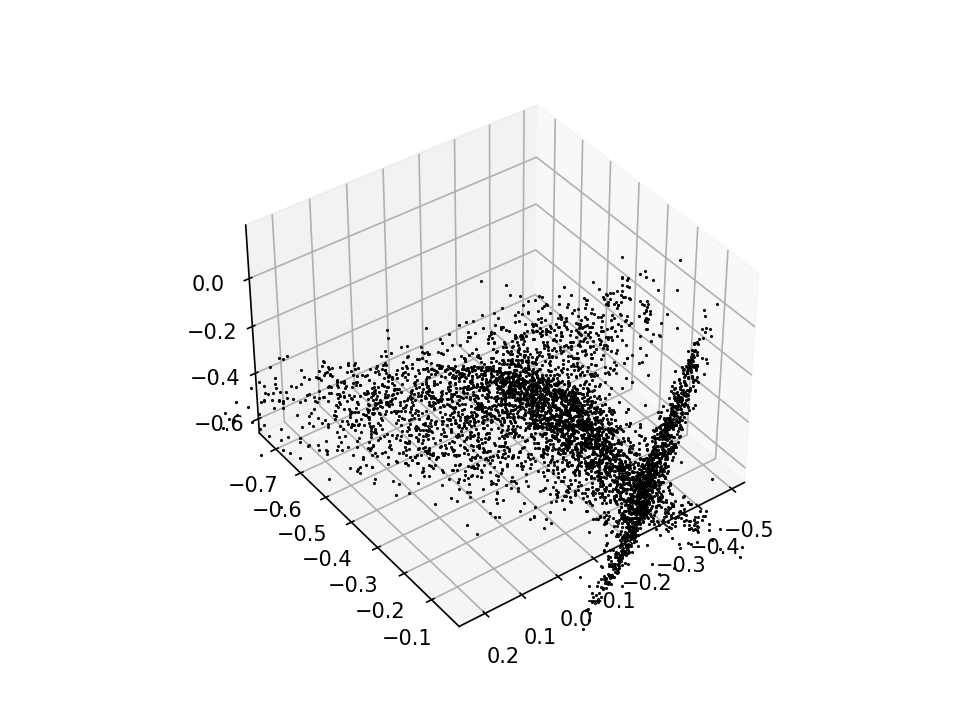

In [46]:
plt.figure()
data_ax = plt.axes(projection='3d')
plt.plot(*X.t(), ls='', marker='.', c='k', ms=1, );

In [82]:
import timm

m = timm.create_model('mobilenetv3_large_100', pretrained=True)
m.eval()

MobileNetV3(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): Hardswish()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [67]:
import pickle as pk

In [71]:
import hashlib
# print(hashlib.md5("whatever your string is".encode('utf-8')).hexdigest())

In [85]:
'test'.split('.')

['test']

In [83]:
code = pk.dumps(m.state_dict())
len(code)

22135297

In [84]:
hashlib.md5(code).hexdigest()

'1e7e9b6ef294aad4de687a656afc8f25'

In [81]:
hashlib.md5(code).hexdigest()

'87ae38e10f9b82fe60502b9478363c73'

In [86]:
timm.create_model?

In [122]:
H, W = 100, 200
x = torch.randn(2,3,H,W)

In [190]:
import torch
import timm
ident = 'mobilenetv3_large_100'
ident = 'xception41'
# ident = 'inception_v3'
m = timm.create_model(ident, pretrained=True)


In [195]:
timm.create_model?

In [188]:

with torch.no_grad():
    y = m.forward_features(x)
x.shape, y.shape

(torch.Size([2, 3, 100, 200]), torch.Size([2, 1280, 1, 1]))

In [189]:
m.num_features

1280

In [191]:
m

XceptionAligned(
  (stem): Sequential(
    (0): ConvBnAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (act): ReLU(inplace=True)
      )
    )
    (1): ConvBnAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (act): ReLU(inplace=True)
      )
    )
  )
  (blocks): Sequential(
    (0): XceptionModule(
      (shortcut): ConvBnAct(
        (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (bn): BatchNormAct2d(
          128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (act): Identity()
        )
      )
      (stack): Sequential(
        (act1): ReLU()
        (conv1): SeparableConv2d(
          (conv_dw): Conv2d(64, 64, k

In [192]:
m.feature_info

[{'num_chs': 128, 'reduction': 2, 'module': 'blocks.0.stack.act3'},
 {'num_chs': 256, 'reduction': 4, 'module': 'blocks.1.stack.act3'},
 {'num_chs': 728, 'reduction': 8, 'module': 'blocks.2.stack.act3'},
 {'num_chs': 1024, 'reduction': 16, 'module': 'blocks.11.stack.act3'},
 {'num_chs': 2048, 'reduction': 32, 'module': 'blocks.12'}]

In [193]:
m.global_pool

AttributeError: 'XceptionAligned' object has no attribute 'global_pool'

In [168]:
next(m.named_parameters())

('stem.0.conv.weight',
 Parameter containing:
 tensor([[[[-4.2471e-02, -2.8781e-01, -5.5322e-02],
           [ 4.9516e-02, -1.0633e-01,  1.1048e-01],
           [ 8.8132e-03, -2.0185e-02,  2.0026e-02]],
 
          [[-8.1340e-02, -2.7778e-01, -7.7230e-02],
           [ 5.0229e-02, -9.9461e-02,  4.3181e-02],
           [ 3.4624e-02, -2.0867e-02,  9.5991e-03]],
 
          [[-6.1926e-02, -2.3951e-01, -2.8497e-02],
           [ 4.7951e-02, -9.6478e-02,  5.7965e-02],
           [ 4.4020e-02, -1.4787e-02,  1.5989e-02]]],
 
 
         [[[ 1.3903e-01, -6.3618e-02, -8.1722e-03],
           [-9.0933e-02, -5.2877e-01, -4.3208e-01],
           [-6.3051e-02, -4.4233e-01, -2.6355e-01]],
 
          [[-3.6282e-02,  8.1148e-02,  4.9362e-02],
           [ 1.2166e-01,  3.5286e-01,  3.0931e-01],
           [ 6.9443e-02,  3.3748e-01,  3.4425e-01]],
 
          [[-1.0966e-01,  2.4108e-02, -1.9414e-02],
           [ 3.4480e-02,  2.1690e-01,  1.4891e-01],
           [-1.9479e-02,  1.4873e-01,  1.3227e-01]]]

In [177]:
def _find_global_pool(m):
    for n,c in m.named_children():
        if n == 'global_pool':
            return c
        else:
            out = _find_global_pool(c)
            if out is not None:
                return out

In [178]:
pool = _find_global_pool(m)
pool

SelectAdaptivePool2d (pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))

In [194]:
m.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

In [163]:
getattr(m.get_classifier(), 'global_pool')

AttributeError: 'Linear' object has no attribute 'global_pool'

In [144]:
with torch.no_grad():
    z = m.head.global_pool(y)
z.shape

AttributeError: 'MobileNetV3' object has no attribute 'head'

In [143]:
m.global_pool

SelectAdaptivePool2d (pool_type=avg, flatten=Identity())

In [112]:
factor = m.feature_info[-1]['reduction']
np.ceil(H/factor), np.ceil(W/factor)

(4.0, 7.0)

In [129]:
y.mean(-1).mean(-1)

tensor([[0.4517, 0.4220, 0.3363,  ..., 0.2982, 0.0295, 0.5426],
        [0.0628, 0.1777, 0.0000,  ..., 0.1022, 0.2657, 0.0000]])

In [125]:
y.mean(-1).mean(-1)

tensor([[0.4517, 0.4220, 0.3363,  ..., 0.2982, 0.0295, 0.5426],
        [0.0628, 0.1777, 0.0000,  ..., 0.1022, 0.2657, 0.0000]])

In [ ]:
o = m(torch.randn(2, 3, 299, 299))
print(f'Original shape: {o.shape}')
o = m.forward_features(torch.randn(2, 3, 299, 299))
print(f'Unpooled shape: {o.shape}')

In [52]:
f.fit(Z.numpy(), Y[...,0].numpy())

GradientBoostingRegressor()

In [54]:
f.feature_importances_.sum()

0.9999999999999999

In [33]:
X = dataset.get_observation()
Y = dataset.get_label()
X.shape, Y.shape

(torch.Size([1000, 3]), torch.Size([1000, 2]))

In [36]:
# plt.figure()
# plt.plot(*Y.t(), ls='',marker='.');

<IPython.core.display.Javascript object>


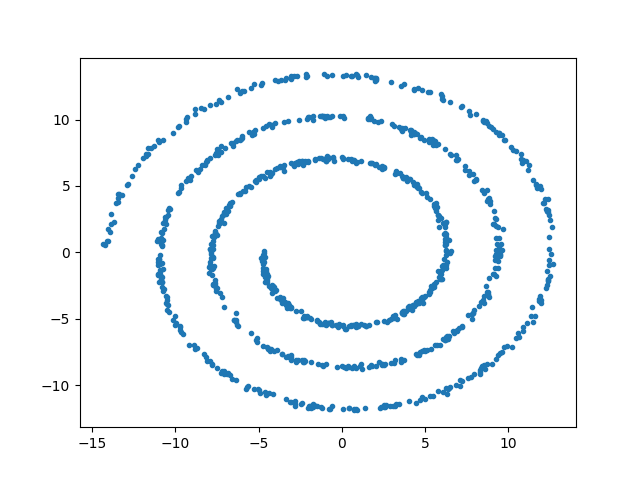

In [37]:
plt.figure()
plt.plot(*X[:,[0,2]].t(), ls='',marker='.');

In [25]:
# from sklearn.datasets import make_swiss_roll
# bX, _ = make_swiss_roll(1000)
# bX.shape
# plt.figure()
# plt.plot(*bX[:,[0,1]].T, ls='',marker='.');

In [7]:
lbl = dataset.generate_mechanism(10)
lbl

tensor([[6.7685, 0.0165],
        [8.6537, 0.5757],
        [7.4921, 0.5531],
        [5.4965, 0.5968],
        [7.4222, 0.8231],
        [7.4931, 0.1936],
        [4.6091, 0.7376],
        [3.5847, 0.0984],
        [5.7974, 0.7874],
        [8.1636, 0.5432]])

In [8]:
dataset.generate_observation_from_mechanism(lbl)

tensor([[-20.6409,   0.3474,  -5.1097],
        [-10.2236,  12.0894, -25.1909],
        [-19.3667,  11.6150, -13.3761],
        [-15.9491,  12.5323,   6.6183],
        [-19.6371,  17.2852, -12.5737],
        [-19.3625,   4.0665, -13.3881],
        [ -9.6970,  15.4897,  10.7536],
        [ -2.4747,   2.0669,  10.9864],
        [-17.6784,  16.5344,   4.3806],
        [-15.1215,  11.4067, -20.7147]])

In [199]:
import torch

In [269]:
class MyObject(torch.Tensor): 
    @staticmethod 
    def __new__(cls, x, *args, **kwargs):
        print('new', args, kwargs)
        return super().__new__(cls, x) 
      
    def __init__(self, x, extra_data, *args, **kwargs): 
        print('init', args, kwargs)
        self.extra_data = extra_data 

    def clone(self, *args, **kwargs): 
        return MyObject(super().clone(*args, **kwargs), self.extra_data)

    def to(self, *args, **kwargs):
        new_obj = MyObject([], self.extra_data)
        new_obj.data = super().to(*args, **kwargs)
        
        return new_obj

In [270]:
obj1 = MyObject(torch.randn(6), 'extra_data_123')
obj1.requires_grad_(True)
obj2 = obj1.to('cuda')

obj2.requires_grad, type(obj2)

new ('extra_data_123',) {}
init () {}
new ('extra_data_123',) {}
init () {}


(False, __main__.MyObject)

In [273]:
obj1

tensor([-1.1228, -0.3258, -1.2187, -0.4926, -0.8572, -0.8724],
       requires_grad=True)

In [271]:
obj2.int()

tensor([-1,  0, -1,  0,  0,  0], device='cuda:0', dtype=torch.int32)

In [272]:
x = torch.rand(3)
x

tensor([0.7075, 0.4794, 0.6092])

In [225]:
from omnibelt import unspecified_argument, duplicate_instance, InitWall

In [274]:

class WrappedTensor(InitWall, torch.Tensor):
	@staticmethod
	def __new__(cls, src, *args, **kwargs):
		return super().__new__(cls, src)


	def __init__(self, src, *args, **kwargs):
		pass

	def copy(self):
		copy = self.__class__.__new__(self.__class__, self)
		copy.__dict__.update(self.__dict__)
		copy.data = self.data
		return copy

	def clone(self, *args, **kwargs):
		new = self.copy()
		new.data = super().clone(*args, **kwargs)
		return new


	def to(self, *args, **kwargs):
		new = self.copy()
		new.data = super().to(*args, **kwargs)
		return new



class SpaceTensor(WrappedTensor):
	def __init__(self, src, space=None, **kwargs):
		super().__init__(src, **kwargs)
		self.space = space



In [293]:

class WrappedTensor(InitWall, torch.Tensor):
	@staticmethod
	def __new__(cls, src, *args, **kwargs):
		return super().__new__(cls, src)


	def __init__(self, src, *args, **kwargs):
		pass

	def copy(self):
		copy = self.__class__.__new__(self.__class__, [])
		copy.__dict__.update(self.__dict__)
		copy.data = self.data
		return copy

	def clone(self, *args, **kwargs):
		new = self.copy()
		new.data = super().clone(*args, **kwargs)
		return new


	def to(self, *args, **kwargs):
		new = self.copy()
		new.data = super().to(*args, **kwargs)
		return new



class SpaceTensor(WrappedTensor):
	def __init__(self, src, space=None, **kwargs):
		super().__init__(src, **kwargs)
		self.space = space


In [294]:
o = SpaceTensor(torch.randn(4), space=1)
o, o.space

(tensor([ 2.6550, -0.0525, -0.3364,  1.0009]), 1)

In [295]:
o2 = o.clone()
o2, o2.space

(tensor([ 2.6550, -0.0525, -0.3364,  1.0009]), 1)

In [296]:
o[0] = 0

In [297]:
o

tensor([ 0.0000, -0.0525, -0.3364,  1.0009])

In [298]:
o2

tensor([ 2.6550, -0.0525, -0.3364,  1.0009])

In [292]:
o2.space

1

In [301]:
class Batch(dict):
    def __getitem__(self, key):
        print('get')
        return super().__getitem__(key)

In [302]:
x = Batch()
x['x'] = 1

In [303]:
x.get('y')

In [304]:
x['x']

get


1

In [311]:
def gen(N=100):
    for i in range(N):
        if i == 3:
            return
        remaining = N-i-1
        yield i
        return

In [312]:
list(gen(10))

[0]

<code object gen at 0x7f71aa109b30, file "/tmp/ipykernel_1083/2245563445.py", line 1>

In [234]:
class Base:
    __slots__ = ('a', 'b', 'c')

class Child(Base):
    pass


obj = Base()
obj.__class__ = Child 

TypeError: __class__ assignment: 'Child' object layout differs from 'Base'

In [236]:
Child.__slots__

('a', 'b', 'c')

In [235]:
Base.__slots__

('a', 'b', 'c')

In [237]:
class T():
    pass

In [238]:
T.__slots__

AttributeError: type object 'T' has no attribute '__slots__'

In [239]:
getattr(obj.__class__, '__slots__')

[autoreload of omnibelt.typing failed: Traceback (most recent call last):
  File "/is/ei/fleeb/miniconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/is/ei/fleeb/miniconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/is/ei/fleeb/miniconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/is/ei/fleeb/miniconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/is/ei/fleeb/wo

('a', 'b', 'c')